<a href="https://colab.research.google.com/github/mamontovatetiana/MyJupyterNotebooks./blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Mamontova_TV_Bachelor_Dipl_G_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving PYTHON MODELING.csv.xlsx to PYTHON MODELING.csv (1).xlsx


In [ ]:
import pandas as pd

# Дістанемо ім’я завантаженого файлу
file_path = list(uploaded.keys())[0]
print("File uploaded:", file_path)

# Зчитуємо
df = pd.read_excel(file_path)
print("Shape:", df.shape)
df.head()


File uploaded: PYTHON MODELING.csv (1).xlsx
Shape: (252, 19)


,year,year train year test,Gender,Age,Family living nearby,Marital status,Working Status,Internally Displaced Persons,GPA,Current Smokers,Current Drinkers,Deceased Relatives,Сombatants,Anxiety GAD 7,Depression PHQ 9,Avoidance Subscale IESR,Intrusion Subscale IESR,Hyperarousal Subscale IESR,PTSD HTQ 5
0,2023,2023,0,21,0,0,0,0,3.7,0,1,0,0,4,0,1,0,3,0
1,2023,2023,0,21,0,0,1,1,3.5,0,1,0,0,5,9,14,14,7,0
2,2023,2023,0,22,1,0,0,1,4.6,0,0,0,0,2,1,0,2,0,0
3,2023,2023,1,22,1,0,0,1,4.0,1,0,0,0,9,14,26,30,24,0
4,2023,2023,0,21,0,0,1,1,3.9,1,0,0,0,3,13,10,16,14,0


In [ ]:
# Базова перевірка
print("Columns:", list(df.columns))
print("\nInfo:")
display(df.info())

# Пропуски
missing = pd.DataFrame({'n_missing': df.isna().sum(), 'pct_missing': df.isna().mean()*100})
display(missing.sort_values('n_missing', ascending=False))

# Дублікати
print("Duplicate rows:", df.duplicated().sum())

# Якщо є колонка з ID / №, покажи приклади
id_cols = [c for c in df.columns if any(x in c.lower() for x in ['№','id','code','код','№'])]
print("Potential id-like columns:", id_cols)
for c in id_cols:
    print(c, df[c].astype(str).head(5).tolist())


Columns: ['year ', 'year train year test', 'Gender', 'Age', 'Family living nearby', 'Marital status', 'Working Status', 'Internally Displaced Persons ', 'GPA', 'Current Smokers', 'Current Drinkers', 'Deceased Relatives', 'Сombatants', 'Anxiety GAD 7', 'Depression PHQ 9', 'Avoidance Subscale IESR', 'Intrusion Subscale IESR', 'Hyperarousal Subscale IESR', 'PTSD HTQ 5']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           252 non-null    int64  
 1   year train year test           252 non-null    int64  
 2   Gender                         252 non-null    int64  
 3   Age                            252 non-null    int64  
 4   Family living nearby           252 non-null    int64  
 5   Marital status                 252 non-null    int64  
 6   Working Status                 25

None

,n_missing,pct_missing
year,0,0.0
year train year test,0,0.0
Gender,0,0.0
Age,0,0.0
Family living nearby,0,0.0
Marital status,0,0.0
Working Status,0,0.0
Internally Displaced Persons,0,0.0
GPA,0,0.0
Current Smokers,0,0.0


Duplicate rows: 0
Potential id-like columns: ['Avoidance Subscale IESR']
Avoidance Subscale IESR ['1', '14', '0', '26', '10']


In [ ]:
import re
import numpy as np

# Спроба знайти IES total та HTQ колонку «гнучко»
ies_candidates = [c for c in df.columns if re.search(r'IES.*total|Total.*IES|Total mean IES|IES.*score|IES-R', c, re.I)]
htq_candidates = [c for c in df.columns if re.search(r'HTQ|HTQ-5|HTQ5|HTQ.*score|PTSD HTQ', c, re.I)]
sub_ies_candidates = [c for c in df.columns if re.search(r'Avoidance|Intrusion|Hyperarousal|Avoidance Subscale|Intrusion Subscale', c, re.I)]

print("IES candidates:", ies_candidates)
print("HTQ candidates:", htq_candidates)
print("IES subscale candidates:", sub_ies_candidates)

# Якщо є прямий total — вибираємо його. Інакше складемо суму підшкал (якщо є).
ies_col = ies_candidates[0] if ies_candidates else None
htq_col = htq_candidates[0] if htq_candidates else None

if ies_col is None and len(sub_ies_candidates) >= 3:
    numeric_subs = [c for c in sub_ies_candidates if pd.to_numeric(df[c], errors='coerce').notna().sum()>0]
    if len(numeric_subs) >= 3:
        df['IES_total_computed'] = df[numeric_subs].apply(pd.to_numeric, errors='coerce').sum(axis=1)
        ies_col = 'IES_total_computed'
        print("Created IES_total_computed from:", numeric_subs[:3])

print("Using IES column:", ies_col)
print("Using HTQ column:", htq_col)

# Перетворимо в числові типи
if ies_col:
    df[ies_col] = pd.to_numeric(df[ies_col], errors='coerce')
if htq_col:
    df[htq_col] = pd.to_numeric(df[htq_col], errors='coerce')

# Встановлені пороги згідно літератури:
ies_threshold = 33   # IES-R >=33 -> ймовірний ПТСР
htq_threshold = 2.5  # HTQ-5 >=2.5 -> ймовірний ПТСР

df['target_IES'] = np.nan
df['target_HTQ'] = np.nan
if ies_col: df['target_IES'] = (df[ies_col] >= ies_threshold).astype(int)
if htq_col: df['target_HTQ'] = (df[htq_col] >= htq_threshold).astype(int)

# Комбіновані варіанти
if df['target_IES'].notna().any() and df['target_HTQ'].notna().any():
    df['target_OR'] = ((df['target_IES']==1) | (df['target_HTQ']==1)).astype(int)
    df['target_AND'] = ((df['target_IES']==1) & (df['target_HTQ']==1)).astype(int)
else:
    # fallback: якщо тільки один опитувальник присутній
    if df['target_IES'].notna().any():
        df['target_OR'] = df['target_IES']; df['target_AND'] = df['target_IES']
    elif df['target_HTQ'].notna().any():
        df['target_OR'] = df['target_HTQ']; df['target_AND'] = df['target_HTQ']
    else:
        raise RuntimeError("Не знайдено IES чи HTQ колонок для створення target. Перевір файл.")

# Розподіли (prevalence)
print("Prevalence (overall):")
display(df[['target_IES','target_HTQ','target_OR','target_AND']].apply(lambda x: x.value_counts(dropna=False)))


IES candidates: []
HTQ candidates: ['PTSD HTQ 5']
IES subscale candidates: ['Avoidance Subscale IESR', 'Intrusion Subscale IESR', 'Hyperarousal Subscale IESR']
Created IES_total_computed from: ['Avoidance Subscale IESR', 'Intrusion Subscale IESR', 'Hyperarousal Subscale IESR']
Using IES column: IES_total_computed
Using HTQ column: PTSD HTQ 5
Prevalence (overall):


,target_IES,target_HTQ,target_OR,target_AND
0,191,252.0,191,252.0
1,61,NaN,61,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder

# знайдемо object (строкові) колонки
cat_cols = [c for c in df.columns if df[c].dtype == 'object']
print("Categorical columns:", cat_cols)

label_cols = []
onehot_cols = []
for c in cat_cols:
    nun = df[c].nunique(dropna=True)
    if nun <= 2:
        label_cols.append(c)
    elif nun <= 10:
        onehot_cols.append(c)
    else:
        label_cols.append(c)  # для багатьох унікальних — label (або видалити, залежить від семантики)

print("Label encode:", label_cols)
print("One-hot:", onehot_cols)

# Робимо копію і кодування
df_enc = df.copy()

le = LabelEncoder()
for c in label_cols:
    try:
        df_enc[c+'_le'] = le.fit_transform(df_enc[c].astype(str))
    except Exception as e:
        print("Label encode failed:", c, e)

# one-hot з drop_first=True (щоб уникнути мультиколінеарності)
df_enc = pd.get_dummies(df_enc, columns=onehot_cols, drop_first=True)
print("Encoded shape:", df_enc.shape)


Categorical columns: []
Label encode: []
One-hot: []
Encoded shape: (252, 24)


In [ ]:
# Виключимо id-like, рік і таргети із features
exclude = ['target_IES','target_HTQ','target_OR','target_AND','year']
id_like = [c for c in df_enc.columns if re.search(r'№|id|код|index', c, re.I)]
exclude += id_like

# numeric features (без exclude)
features = [c for c in df_enc.select_dtypes(include=[float,int]).columns if c not in exclude]
print("Selected numeric features count:", len(features))
print(features[:60])

# Додатково можна явно додати важливі вербальні колонки, якщо вони в dataset
manual_candidates = ['Age','GPA Score','Anxiety (GAD-7)','Depression (PHQ -9)',
                     'Avoidance Subscale IES-R','Intrusion Subscale (IES-R)','Hyperarousal Subscale (IES-R)',
                     'PTSD HTQ 5','IES_total_computed']
for c in manual_candidates:
    if c in df_enc.columns and c not in features:
        features.append(c)

print("Final features count:", len(features))

# Підготовка датасету для моделювання: видаляємо рядки без target_OR
df_model = df_enc[~df_enc['target_OR'].isna()].copy()
print("Rows for modeling:", df_model.shape[0])

# Розбиття train/test за роками, якщо є колонка year
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

if 'year' in df_model.columns and df_model['year'].notna().any():
    train_df = df_model[df_model['year'].isin([2023,2024])].copy()
    test_df  = df_model[df_model['year']==2025].copy()
    print("Train shape (2023+2024):", train_df.shape, "Test shape (2025):", test_df.shape)
    if test_df.shape[0] == 0:
        print("Warning: test set for 2025 is empty. Перевір колонку year.")
else:
    # fallback: stratified 80/20
    train_df, test_df = train_test_split(df_model, test_size=0.2, stratify=df_model['target_OR'], random_state=42)
    print("Fallback: stratified random split used. Train:", train_df.shape, "Test:", test_df.shape)

X_train = train_df[features].fillna(0)
y_train = train_df['target_OR'].astype(int)
X_test  = test_df[features].fillna(0)
y_test  = test_df['target_OR'].astype(int)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)


Selected numeric features count: 19
['year ', 'year train year test', 'Gender', 'Age', 'Family living nearby', 'Marital status', 'Working Status', 'Internally Displaced Persons ', 'GPA', 'Current Smokers', 'Current Drinkers', 'Deceased Relatives', 'Сombatants', 'Anxiety GAD 7', 'Depression PHQ 9', 'Intrusion Subscale IESR', 'Hyperarousal Subscale IESR', 'PTSD HTQ 5', 'IES_total_computed']
Final features count: 19
Rows for modeling: 252
Fallback: stratified random split used. Train: (201, 24) Test: (51, 24)


Decision Tree report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        12

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

ROC-AUC (DT): 1.0


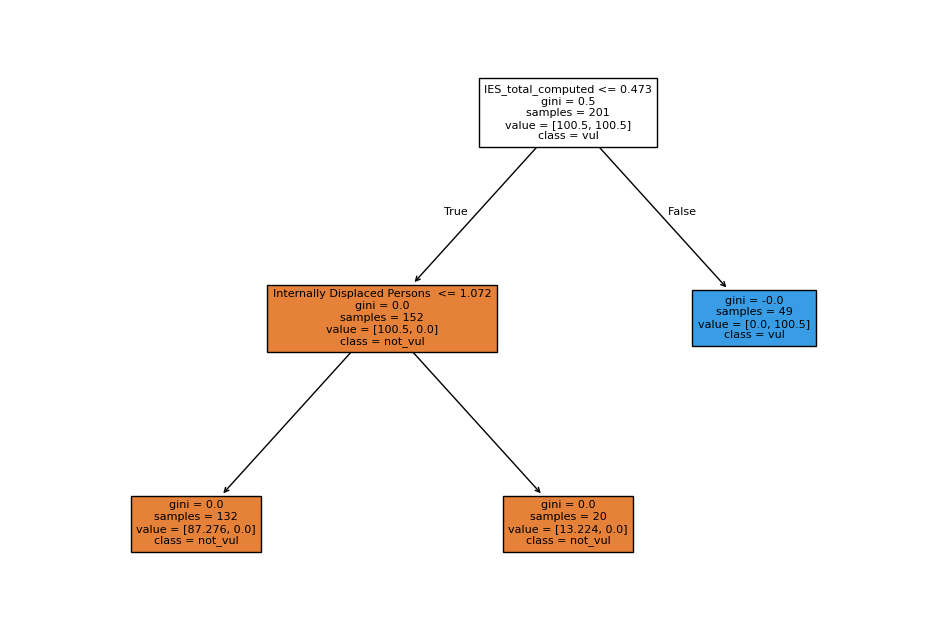

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Best params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50} CV roc_auc: 0.9895833333333333
XGBoost report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        12

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

ROC-AUC (XGB): 1.0


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:26:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

dt = DecisionTreeClassifier(max_depth=4, random_state=42, class_weight='balanced')
dt.fit(X_train_sc, y_train)
y_pred_dt = dt.predict(X_test_sc)
y_proba_dt = dt.predict_proba(X_test_sc)[:,1]
print("Decision Tree report:")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC (DT):", roc_auc_score(y_test, y_proba_dt))

# Візуалізація дерева (не надто велике)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=features, class_names=['not_vul','vul'], filled=True, fontsize=8)
plt.show()

# XGBoost з GridSearch (швидкий пошук)
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, GridSearchCV

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid = {'n_estimators':[50,100], 'max_depth':[3,5], 'learning_rate':[0.05,0.1]}
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
gs = GridSearchCV(xgb_clf, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)
gs.fit(X_train_sc, y_train)
best_xgb = gs.best_estimator_
print("Best params:", gs.best_params_, "CV roc_auc:", gs.best_score_)

y_pred_xgb = best_xgb.predict(X_test_sc)
y_proba_xgb = best_xgb.predict_proba(X_test_sc)[:,1]
print("XGBoost report:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC (XGB):", roc_auc_score(y_test, y_proba_xgb))


,accuracy,precision,recall,f1,roc_auc
DecisionTree,1.0,1.0,1.0,1.0,1.0
XGBoost,1.0,1.0,1.0,1.0,1.0


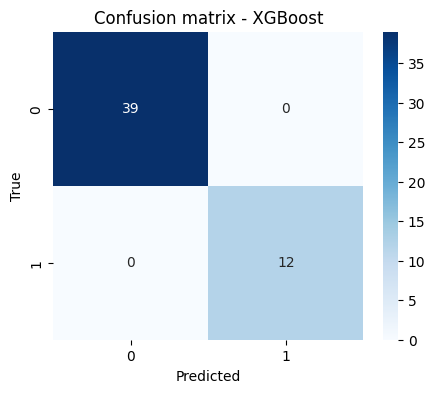

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics(y_true, y_pred, y_proba):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, zero_division=0),
        'recall': recall_score(y_true, y_pred, zero_division=0),
        'f1': f1_score(y_true, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_true, y_proba)
    }

summary = pd.DataFrame({
    'DecisionTree': metrics(y_test, y_pred_dt, y_proba_dt),
    'XGBoost': metrics(y_test, y_pred_xgb, y_proba_xgb)
}).T
display(summary)

# Confusion matrix for XGBoost
import seaborn as sns, matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion matrix - XGBoost')
plt.show()


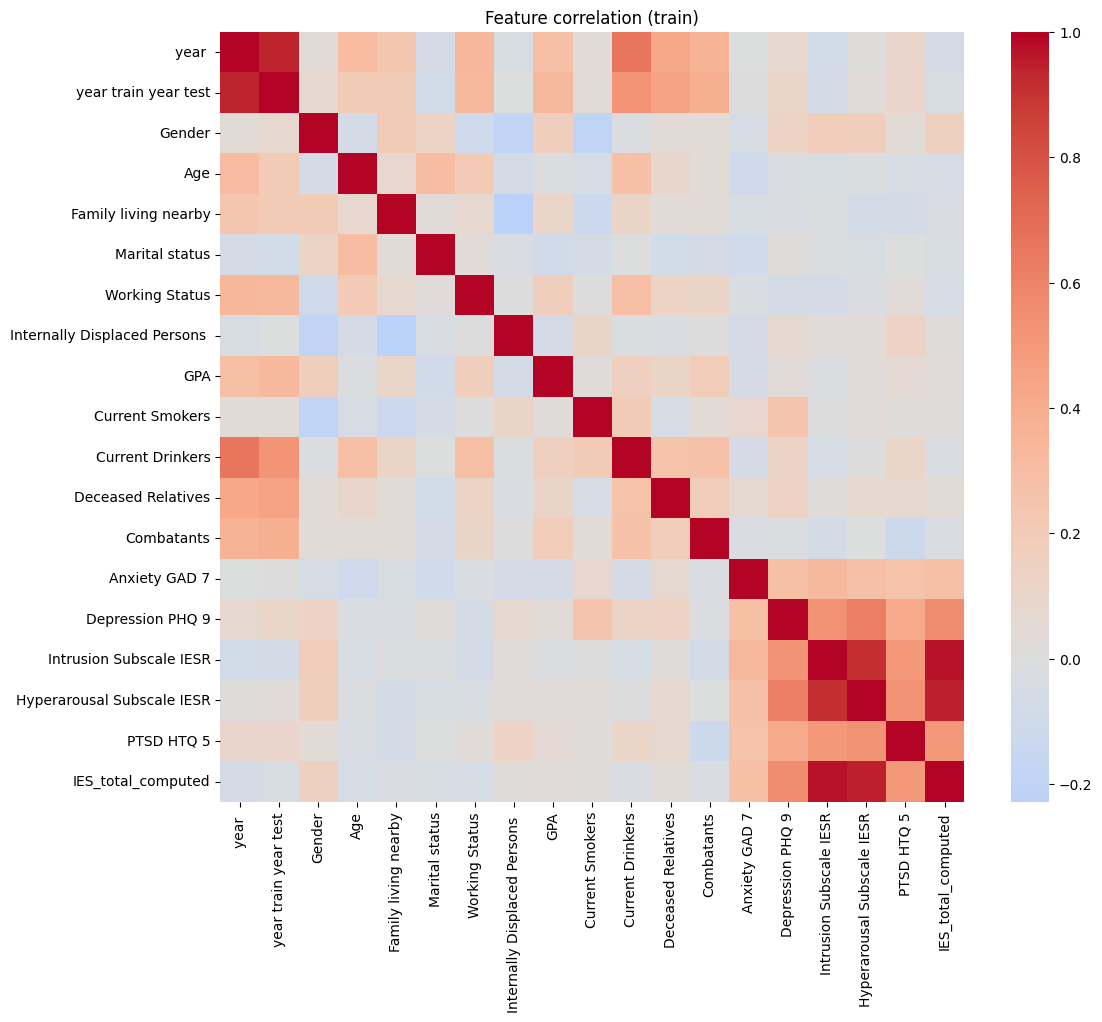

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
corr = pd.DataFrame(X_train_sc, columns=features).corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature correlation (train)')
plt.show()


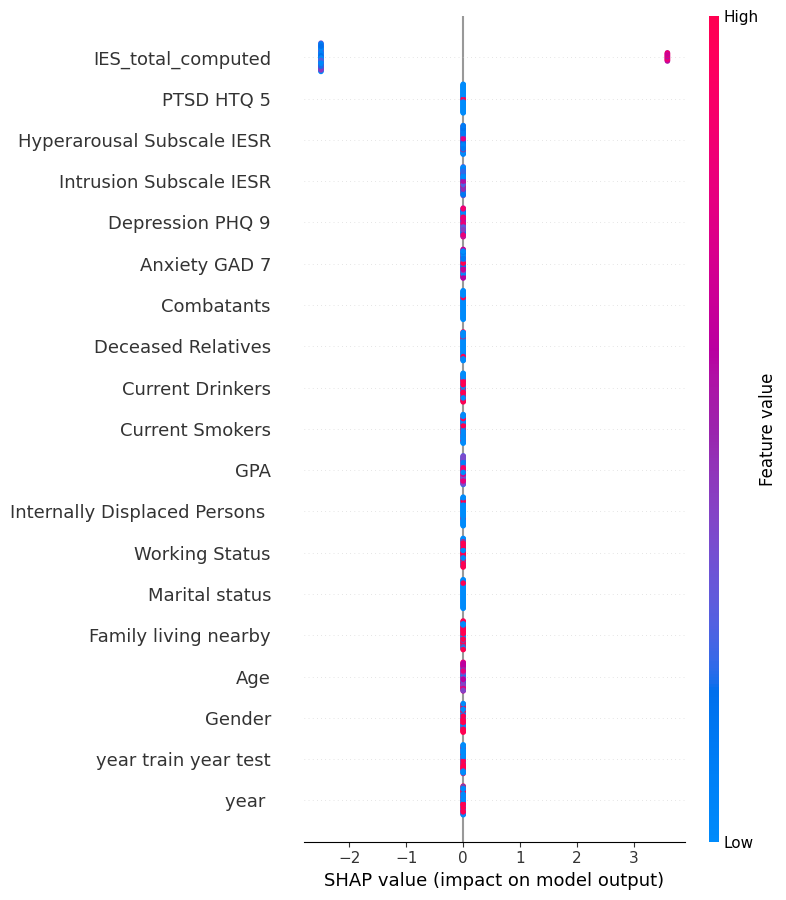

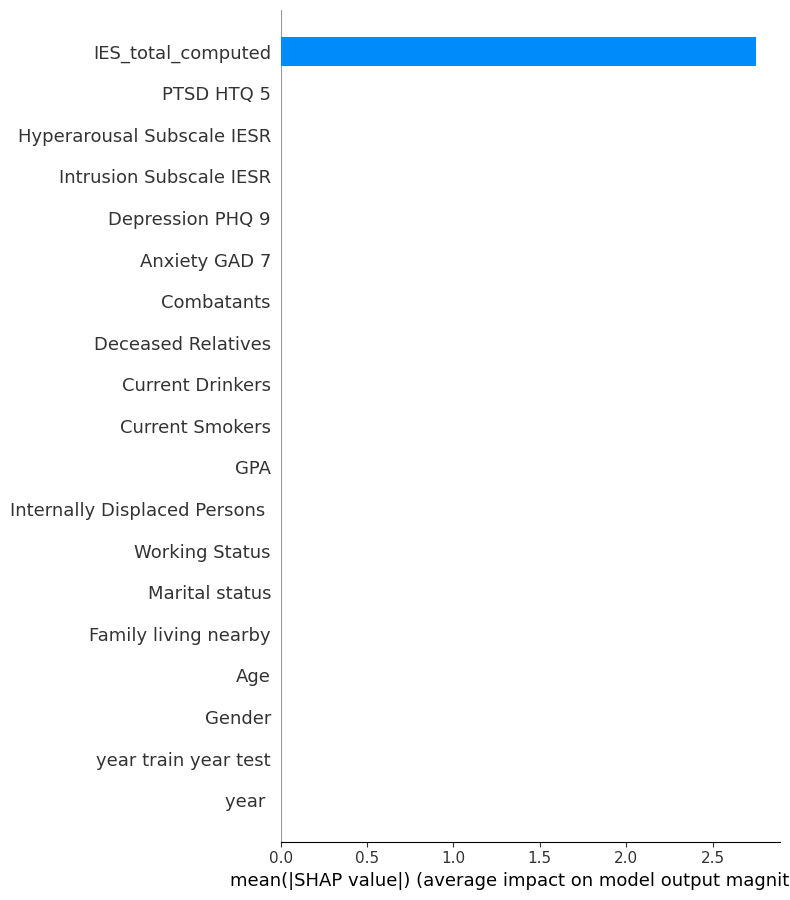

In [ ]:
import shap
# TreeExplainer підходить для XGBoost
explainer = shap.TreeExplainer(best_xgb)
# Для швидкості беремо невелику підвибірку тесту
sample_n = min(100, X_test_sc.shape[0])
sample_idx = np.random.choice(X_test_sc.shape[0], sample_n, replace=False)
X_sample = X_test_sc[sample_idx]

shap_values = explainer.shap_values(X_sample)

# summary dot plot
shap.summary_plot(shap_values, pd.DataFrame(X_sample, columns=features))

# bar plot (average absolute shap value)
shap.summary_plot(shap_values, pd.DataFrame(X_sample, columns=features), plot_type='bar')


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP used


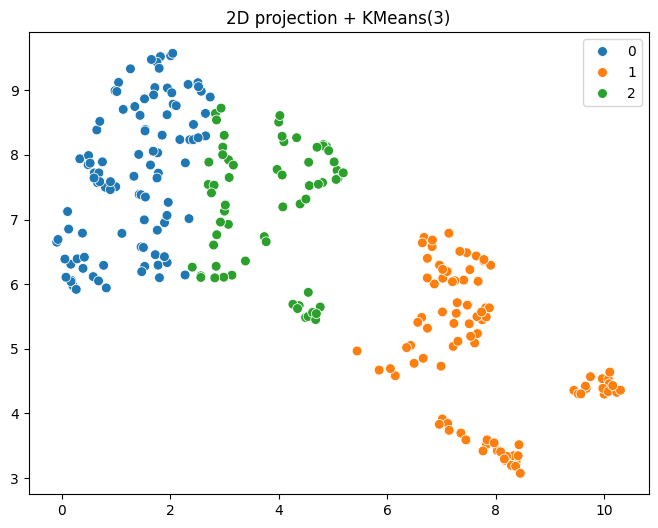

Saved prepared dataset to: /content/PYTHON_MODELING_PREPARED_with_clusters.csv


cluster_k3,0,1,2
year,2023.020202,2024.977778,2023.507937
year train year test,2023.000000,2024.955556,2023.063492
Gender,0.535354,0.588889,0.619048
Age,19.818182,21.011111,21.666667
Family living nearby,0.454545,0.722222,0.619048
Marital status,0.010101,0.011111,0.174603
Working Status,0.202020,0.633333,0.571429
Internally Displaced Persons,0.222222,0.100000,0.000000
GPA,3.960606,4.151444,3.973810
Current Smokers,0.191919,0.355556,0.317460


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

use_umap = False
try:
    import umap
    use_umap = True
except:
    use_umap = False
    print("UMAP not available — використовуєм PCA як fallback.")

X_all = scaler.transform(df_model[features].fillna(0))

if use_umap:
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
    X_red = reducer.fit_transform(X_all)
    print("UMAP used")
else:
    pca = PCA(n_components=2, random_state=42)
    X_red = pca.fit_transform(X_all)
    print("PCA used")

kmeans = KMeans(n_clusters=3, random_state=42).fit(X_red)
labels = kmeans.labels_

import matplotlib.pyplot as plt, seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_red[:,0], y=X_red[:,1], hue=labels, palette='tab10', s=50)
plt.title('2D projection + KMeans(3)')
plt.show()

# додаємо до df_model
df_model = df_model.reset_index(drop=True)
df_model['dim0'] = X_red[:,0]; df_model['dim1'] = X_red[:,1]; df_model['cluster_k3'] = labels

# збережемо підготовлений датасет
out_path = '/content/PYTHON_MODELING_PREPARED_with_clusters.csv'
df_model.to_csv(out_path, index=False)
print("Saved prepared dataset to:", out_path)

# середні значення фіч по кластерам
display(df_model.groupby('cluster_k3')[features].mean().T)


MLP report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        39
           1       1.00      0.75      0.86        12

    accuracy                           0.94        51
   macro avg       0.96      0.88      0.91        51
weighted avg       0.95      0.94      0.94        51

ROC-AUC (MLP): 1.0


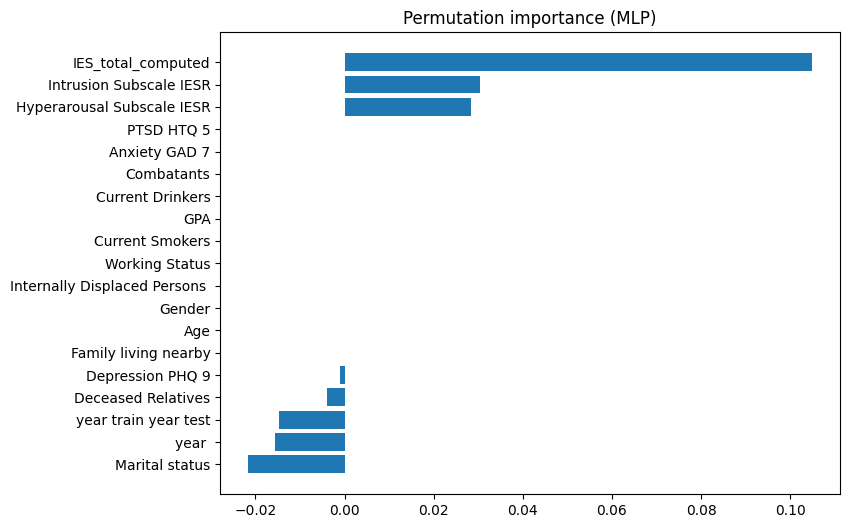

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp.fit(X_train_sc, y_train)
y_pred_mlp = mlp.predict(X_test_sc)
y_proba_mlp = mlp.predict_proba(X_test_sc)[:,1]

from sklearn.metrics import classification_report, roc_auc_score
print("MLP report:")
print(classification_report(y_test, y_pred_mlp))
print("ROC-AUC (MLP):", roc_auc_score(y_test, y_proba_mlp))

# Permutation importance (швидко і інформативно)
perm = permutation_importance(mlp, X_test_sc, y_test, n_repeats=20, random_state=42)
idx = perm.importances_mean.argsort()[::-1][:20]
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.barh([features[i] for i in idx[::-1]], perm.importances_mean[idx][::-1])
plt.title('Permutation importance (MLP)')
plt.show()

# Якщо хочеш SHAP для NN — це можна зробити через KernelExplainer, але це значно повільніше.


In [ ]:
# Додаємо прогнози XGBoost в test_df для аналізу
test_df = test_df.reset_index(drop=True)
test_df['pred_xgb'] = y_pred_xgb
test_df['proba_xgb'] = y_proba_xgb

fn = test_df[(test_df['target_OR']==1) & (test_df['pred_xgb']==0)]
fp = test_df[(test_df['target_OR']==0) & (test_df['pred_xgb']==1)]

print("False negatives:", fn.shape[0], "rows")
display(fn.head(5))
print("\nFalse positives:", fp.shape[0], "rows")
display(fp.head(5))


False negatives: 0 rows


,year,year train year test,Gender,Age,Family living nearby,Marital status,Working Status,Internally Displaced Persons,GPA,Current Smokers,...,Intrusion Subscale IESR,Hyperarousal Subscale IESR,PTSD HTQ 5,IES_total_computed,target_IES,target_HTQ,target_OR,target_AND,pred_xgb,proba_xgb



False positives: 0 rows


,year,year train year test,Gender,Age,Family living nearby,Marital status,Working Status,Internally Displaced Persons,GPA,Current Smokers,...,Intrusion Subscale IESR,Hyperarousal Subscale IESR,PTSD HTQ 5,IES_total_computed,target_IES,target_HTQ,target_OR,target_AND,pred_xgb,proba_xgb
